<a href="https://colab.research.google.com/github/busiri/busil/blob/main/year_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 도입기

In [14]:
import pandas as pd

df_도입 = pd.read_csv('/content/raw_도입기.csv')
df_도입.head()

,회사명,거래소코드,회계년도,총자본증가율,유형자산증가율,비유동자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,...,kosdaq변화율,G20경기선행지수변화율,Korea경기선행지수변화율,US경기선행지수변화율,China경기선행지수변화율,대표이사변경여부,수도권,업력,부실여부,생애주기
0,(유)가든주류,97082,2020,-0.92,11.15,17.83,-10.63,-29.66,-40.28,-12.73,...,0.103629,-0.021683,0.010025,-0.014162,-0.015742,0,0,25.0,0,도입기
1,(유)기흥모터스,94470,2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.154253,-0.009823,-0.009045,-0.014350,-0.007639,0,1,20.0,0,도입기
2,(유)기흥모터스,94470,2022,61.84,63.46,37.38,81.57,149.07,12.57,12.56,...,-0.180418,-0.016975,-0.024620,-0.013245,-0.029802,0,1,23.0,0,도입기
3,(유)기흥모터스,94470,2023,11.58,32.26,20.67,6.03,-16.20,0.75,-10.81,...,0.023079,0.002412,-0.010279,-0.008598,0.026422,0,1,24.0,0,도입기
4,(유)나눔디앤씨,102441,2022,25.82,-9.09,14.88,25.87,30.08,53.10,-8.39,...,-0.180418,-0.016975,-0.024620,-0.013245,-0.029802,0,0,8.0,0,도입기


In [15]:
# 회계년도 2010과 2011을 제거하지 않았을때
before_도입 = df_도입['부실여부'].value_counts()

In [16]:
# 회계년도 2010과 2011을 제거했을때
df_del = df_도입[df_도입['회계년도']>2011]
after_도입 = df_del['부실여부'].value_counts()

In [17]:
pd.concat([before_도입,after_도입],axis=1)

,count,count
부실여부,,
0,43484,38168
1,4203,4203


### 성장기

In [4]:
df_성장 = pd.read_csv('/content/raw_성장기.csv')
df_성장['부실여부'].value_counts()

,count
부실여부,
0,59718
1,1613


In [8]:
df_성장_del = df_성장[(df_성장['회계년도']>2011)]
df_성장_del['부실여부'].value_counts()

,count
부실여부,
0,52428
1,1613


In [18]:
before_성장 = df_성장['부실여부'].value_counts()
after_성장 = df_성장_del['부실여부'].value_counts()

### 성숙기

In [10]:
df_성숙 = pd.read_csv('/content/raw_성숙기.csv')
df_성숙['부실여부'].value_counts()

,count
부실여부,
0,73664
1,2140


In [11]:
df_성숙_del = df_성숙[(df_성숙['회계년도']>2011)]
df_성숙_del['부실여부'].value_counts()

,count
부실여부,
0,66149
1,2140


In [19]:
before_성숙 = df_성숙['부실여부'].value_counts()
after_성숙 = df_성숙_del['부실여부'].value_counts()

### 쇠퇴기

In [12]:
df_쇠퇴 = pd.read_csv('/content/raw_쇠퇴기.csv')
df_쇠퇴['부실여부'].value_counts()

,count
부실여부,
0,23139
1,3702


In [13]:
df_쇠퇴_del = df_쇠퇴[(df_쇠퇴['회계년도']>2011)]
df_쇠퇴_del['부실여부'].value_counts()

,count
부실여부,
0,20300
1,3702


In [20]:
before_쇠퇴 = df_쇠퇴['부실여부'].value_counts()
after_쇠퇴 = df_쇠퇴_del['부실여부'].value_counts()

In [25]:
info = pd.concat([before_도입,after_도입,before_성장,after_성장,before_성숙,after_성숙,before_쇠퇴,after_쇠퇴],axis=1)
info.columns = ['before_도입','after_도입','before_성장','after_성장','before_성숙','after_성숙','before_쇠퇴','after_쇠퇴']
info.index = ['정상','부실']
info

,before_도입,after_도입,before_성장,after_성장,before_성숙,after_성숙,before_쇠퇴,after_쇠퇴
정상,43484,38168,59718,52428,73664,66149,23139,20300
부실,4203,4203,1613,1613,2140,2140,3702,3702


/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['before_도입'].plot(kind='hist', bins=20, title='before_도입')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['after_도입'].plot(kind='hist', bins=20, title='after_도입')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['before_성장'].plot(kind='hist', bins=20, title='before_성장')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['after_성장'].plot(kind='hist', bins=20, title='after_성장')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info.plot(kind='scatter', x='before_도입', y='after_도입', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info.plot(kind='scatter', x='after_도입', y='before_성장', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info.plot(kind='scatter', x='before_성장', y='after_성장', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49689 (\N{HANGUL SYLLABLE SUG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info.plot(kind='scatter', x='after_성장', y='before_성숙', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['before_도입'].plot(kind='line', figsize=(8, 4), title='before_도입')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['after_도입'].plot(kind='line', figsize=(8, 4), title='after_도입')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['before_성장'].plot(kind='line', figsize=(8, 4), title='before_성장')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
info['after_성장'].plot(kind='line', figsize=(8, 4), title='after_성장')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
# ✅ 한글 폰트 설치 및 설정 (Colab 재시작 시마다 실행 필요)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# 폰트 설치
!sudo apt-get install -y fonts-nanum

# 설치된 Nanum 폰트 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum/']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

# 폰트 매니저에 폰트 추가
for font_file in font_files:
    fm.fontManager.addfont(font_file)

for f in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Nanum' in f:
        print(f)
# 폰트 이름 확인
nanum_font = fm.FontProperties(fname=font_files[0]).get_name()

# 폰트 설정
plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = nanum_font
mpl.rcParams['axes.unicode_minus'] = False

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False


print(f"✅ 한글 폰트 설치 및 설정 완료! 적용 폰트: {nanum_font}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,574 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and dire

In [27]:
info

,before_도입,after_도입,before_성장,after_성장,before_성숙,after_성숙,before_쇠퇴,after_쇠퇴
정상,43484,38168,59718,52428,73664,66149,23139,20300
부실,4203,4203,1613,1613,2140,2140,3702,3702


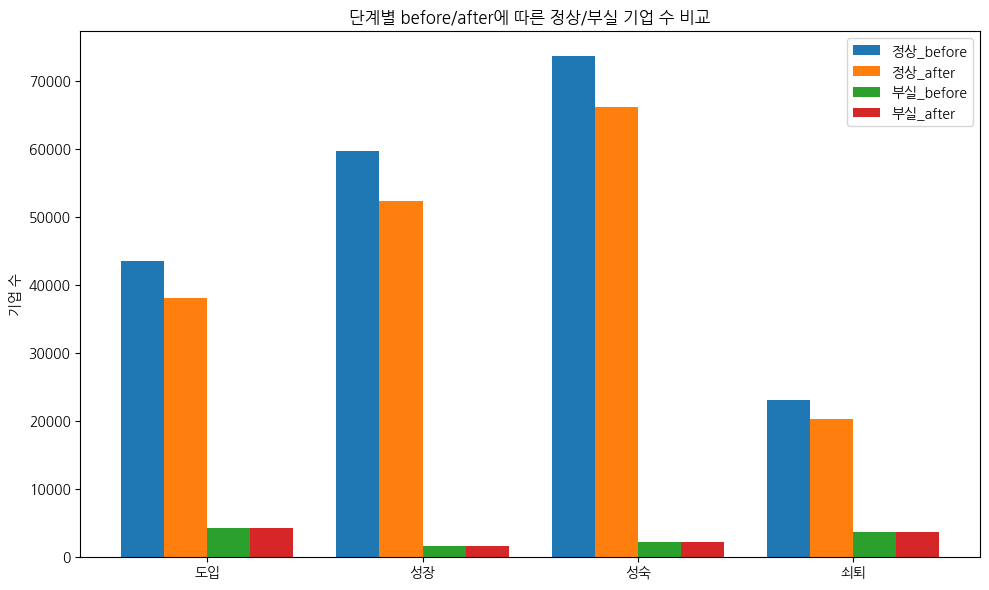

In [30]:
import numpy as np
# 단계 이름 추출
stages = ['도입', '성장', '성숙', '쇠퇴']
x = np.arange(len(stages))  # 4개 단계

# 막대 너비 설정
width = 0.2

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그리기
ax.bar(x - width*1.5, info.loc['정상'][::2], width, label='정상_before')
ax.bar(x - width/2,  info.loc['정상'][1::2], width, label='정상_after')
ax.bar(x + width/2,  info.loc['부실'][::2], width, label='부실_before')
ax.bar(x + width*1.5, info.loc['부실'][1::2], width, label='부실_after')

# 레이블 및 제목
ax.set_ylabel('기업 수')
ax.set_title('단계별 before/after에 따른 정상/부실 기업 수 비교')
ax.set_xticks(x)
ax.set_xticklabels(stages)
ax.legend()

plt.tight_layout()
plt.show()

In [35]:
info

for col in info.columns:
  value = (info[col].iloc[1]/info[col].sum())*100
  print(f"{col} 부실 기업 비율 : {value}")

before_도입 부실 기업 비율 : 8.813722817539372
after_도입 부실 기업 비율 : 9.919520426706946
before_성장 부실 기업 비율 : 2.6299913583668943
after_성장 부실 기업 비율 : 2.9847708221535503
before_성숙 부실 기업 비율 : 2.8230700226900955
after_성숙 부실 기업 비율 : 3.133740426715869
before_쇠퇴 부실 기업 비율 : 13.792332625461048
after_쇠퇴 부실 기업 비율 : 15.423714690442464


In [41]:
for i in range(0,8,2):
  print(f"원 데이터 수 : {info.iloc[0,i]+info.iloc[1,i]}, 줄어드는 데이터 수 : {info.iloc[0,i]-info.iloc[0,i+1]}")

원 데이터 수 : 47687, 줄어드는 데이터 수 : 5316
원 데이터 수 : 61331, 줄어드는 데이터 수 : 7290
원 데이터 수 : 75804, 줄어드는 데이터 수 : 7515
원 데이터 수 : 26841, 줄어드는 데이터 수 : 2839


In [38]:
len(df_도입)

47687

In [39]:
47687-5316

42371